# Numpy, Matplotlib and Sklearn Tutorial

We often use numpy to handle high dimensional arrays.

Let's try the basic operation of numpy:

In [2]:
import numpy as np

def info(n,a):
    print(n+":",a.ndim, a.shape, a.size, a.dtype, type(a))
    print(a)
    
a = np.array([[1,2,3], [2,3,4]])
info("a",a)
b = np.zeros((3,4))
info("b",b)
c = np.ones((3,4))
info("c",c) 
d = np.random.randn(2,3)
info("d",d)
e = np.array([[1,2], [2,3], [3,4]])
info("e",e)
f = b*2 - c*3
info("f",f)
g = 2*c*f # same shape can mutilply directly, not dot, multiply by pos
info("g",g)
h = np.dot(a,e)
info("h",h)
i = e.mean(axis=0)
info("i",i)
j = e.max(axis=1)
print("j:",j, j.shape)
k = a[-1][:2]
info("k",k)

# You can print a to k for details

a: 2 (2, 3) 6 int32 <class 'numpy.ndarray'>
[[1 2 3]
 [2 3 4]]
b: 2 (3, 4) 12 float64 <class 'numpy.ndarray'>
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
c: 2 (3, 4) 12 float64 <class 'numpy.ndarray'>
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
d: 2 (2, 3) 6 float64 <class 'numpy.ndarray'>
[[ 2.0140446   1.29615443 -0.22005298]
 [ 0.80298376 -0.60176445 -0.67849738]]
e: 2 (3, 2) 6 int32 <class 'numpy.ndarray'>
[[1 2]
 [2 3]
 [3 4]]
f: 2 (3, 4) 12 float64 <class 'numpy.ndarray'>
[[-3. -3. -3. -3.]
 [-3. -3. -3. -3.]
 [-3. -3. -3. -3.]]
g: 2 (3, 4) 12 float64 <class 'numpy.ndarray'>
[[-6. -6. -6. -6.]
 [-6. -6. -6. -6.]
 [-6. -6. -6. -6.]]
h: 2 (2, 2) 4 int32 <class 'numpy.ndarray'>
[[14 20]
 [20 29]]
i: 1 (2,) 2 float64 <class 'numpy.ndarray'>
[2. 3.]
j: [2 3 4] (3,)
k: 1 (2,) 2 int32 <class 'numpy.ndarray'>
[2 3]


matplotlib.pyplot provides very useful apis for drawing graphs.

Let's try the basic operation of matplotlib.pyplot:

In [3]:
import matplotlib.pyplot as plt

x = np.arange(2, 10, 0.2) # begin end step

plt.plot(x, x**1.5*.5, 'r-', x, np.log(x)*5, 'g--', x, x, 'b.') # every three args is a group  'color|style'
plt.show()

<Figure size 640x480 with 1 Axes>

If you want to print them in different graphs, try this:

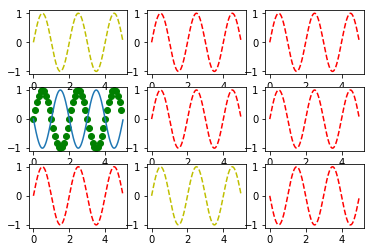

In [4]:
def f(x):
    return np.sin(np.pi*x)

x1 = np.arange(0, 5, 0.1)
x2 = np.arange(0, 5, 0.01)

# subplot() construct plot array,assign: numrows,numcols,fignum, when numrows*numcols < 10, no need for ','
plt.subplot(334)  
plt.plot(x1, f(x1), 'go', x2, f(x2-1))

plt.subplot(332)
plt.plot(x2, f(x2), 'r--')

plt.subplot(331)
plt.plot(x2, f(x2), 'y--')

plt.subplot(333)
plt.plot(x2, f(x2), 'r--')

plt.subplot(335)
plt.plot(x2, f(x2), 'r--')

plt.subplot(336)
plt.plot(x2, f(x2), 'r--')

plt.subplot(337)
plt.plot(x2, f(x2), 'r--')

plt.subplot(338)
plt.plot(x2, f(x2), 'y--')

plt.subplot(339)
plt.plot(x2, f(x2+1), 'r--')

plt.show()

How about printing images?

Let's try to print a image whose pixels gradually change:

Different pixel values represent different gray levels.

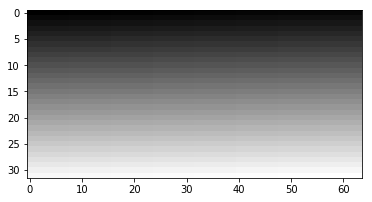

In [5]:
img = np.arange(0, 1, 1/32/64) # define an 1D array with 32x32 elements gradually increasing
img = img.reshape(32, 64) # reshape it into 32x32 array, the array represents a 32x32 image,
                          # each element represents the corresponding pixel of the image
plt.imshow(img, cmap='gray')
plt.show()

Based on numpy, Scikit-learn (sklearn) provides a lot of tools for machine learning.It is a very powerful machine learning library.

Then, let's use it for mnist classification:

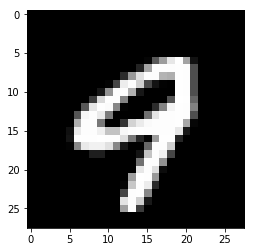

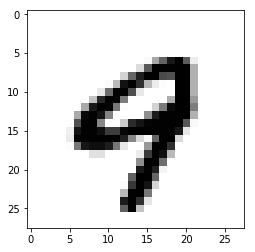

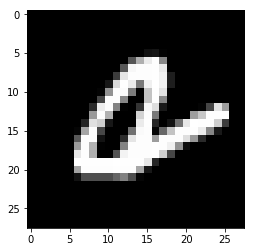

In [6]:
from sklearn.datasets import fetch_mldata

# download and read mnist
mnist = fetch_mldata('MNIST original', data_home='./')

# 'mnist.data' is 70k x 784 array, each row represents the pixels from a 28x28=784 image
# 'mnist.target' is 70k x 1 array, each row represents the target class of the corresponding image
images = mnist.data
targets = mnist.target

# make the value of pixels from [0, 255] to [0, 1] for further process
X = mnist.data / 255.  # what use ?
Y = mnist.target

# print the first image of the dataset
img1 = X[69999].reshape(28, 28)
#img1 = np.reshape(X[69999], (28,28), order='C')
plt.imshow(img1, cmap='gray')
plt.show()

# print the images after simple transformation
img2 = 1 - img1
plt.imshow(img2, cmap='gray')
plt.show()

img3 = img1.transpose()
plt.imshow(img3, cmap='gray')
plt.show()

In [8]:
X[0].reshape

<function ndarray.reshape>

In [9]:
# split data to train and test (for faster calculation, just use 1/10 data)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X[::10], Y[::10], test_size=1000)

#### Q1:
Please use the logistic regression(default parameters) in sklearn to classify the data above, and print the training accuracy and test accuracy.

In [13]:
# TODO:use logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

LR = LogisticRegression()
LR.fit(X_train, Y_train)
train_accuracy = LR.score(X_train, Y_train)
#train_accuracy = metrics.accuracy_score(LR.predict(X_train), Y_train)
test_accuracy =LR.score(X_test, Y_test)
#test_accuracy = metrics.accuracy_score(LR.predict(X_test), Y_test)

print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 95.77%
Testing accuracy: 91.10%


#### Q2:
Please use the naive bayes(Bernoulli, default parameters) in sklearn to classify the data above, and print the training accuracy and test accuracy.

In [20]:
# TODO:use naive bayes
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, Y_train)
train_accuracy = BNB.score(X_train, Y_train)
#train_accuracy = metrics.accuracy_score(BNB.predict(X_train), Y_train)
test_accuracy =BNB.score(X_test, Y_test)
#test_accuracy = metrics.accuracy_score(BNB.predict(X_test), Y_test)

print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 84.03%
Testing accuracy: 81.90%


#### Q3:
Please use the support vector machine(default parameters) in sklearn to classify the data above, and print the training accuracy and test accuracy.

In [63]:
# TODO:use support vector machine
from sklearn.svm import LinearSVC

SVC = LinearSVC()
SVC.fit(X_train, Y_train)
train_accuracy = SVC.score(X_train, Y_train)
#train_accuracy = metrics.accuracy_score(SVC.predict(X_train), Y_train)
test_accuracy =SVC.score(X_test, Y_test)
#test_accuracy = metrics.accuracy_score(SVC.predict(X_test), Y_test)

print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 98.15%
Testing accuracy: 88.40%


#### Q4:
Please adjust the parameters of SVM to increase the testing accuracy, and print the training accuracy and test accuracy.

In [82]:
# TODO:use SVM with another group of parameters

SVC2 = LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-04, verbose=0)
SVC2.fit(X_train, Y_train)
train_accuracy = SVC2.score(X_train, Y_train)
#train_accuracy = metrics.accuracy_score(SVC2.predict(X_train), Y_train)
test_accuracy =SVC2.score(X_test, Y_test)
#test_accuracy = metrics.accuracy_score(SVC2.predict(X_test), Y_test)

print('Training accuracy: %0.2f%%' % (train_accuracy*100))
print('Testing accuracy: %0.2f%%' % (test_accuracy*100))

Training accuracy: 95.85%
Testing accuracy: 90.60%
